By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/03/15

Videos:
* [[10分鐘搞懂機器學習] 2.5 你的模型選對了嗎? 錯誤的模型給你錯誤的預測](https://youtu.be/y9XzNjFoNIE?si=7TsnGUSqiiYimDsi)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


Coefficients: [0.01018813]
Intercept: 1.2045732389198067


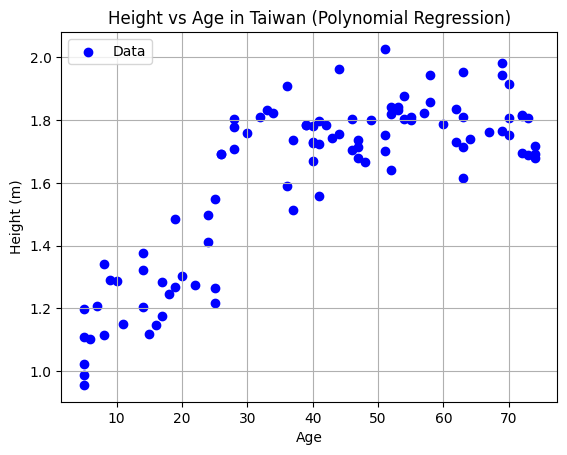

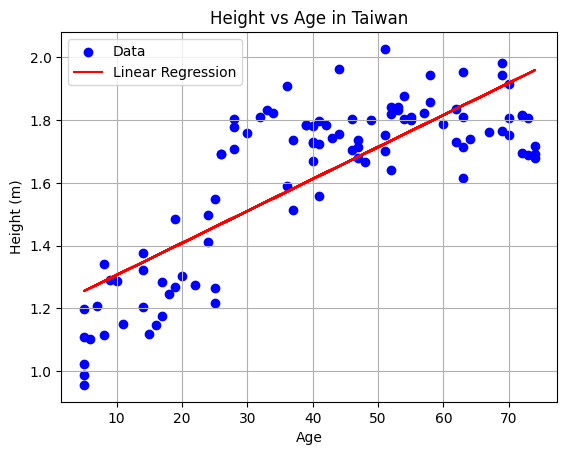

In [1]:
# underfitting
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 生成模拟数据
np.random.seed(0)
num_sample=100
age = np.random.randint(5, 75, num_sample)  # 生成100个年龄数据，范围在18到80岁之间

# 身高在26岁之前与年龄成正比
height = 1.1 + 0.01 * age + np.random.uniform(-0.2, 0.2, num_sample)
# 在26岁之后身高设为固定值，同时添加噪声
height[age >= 26] = 1.5 + 0.01 * 26 + np.random.normal(0, 0.1, np.sum(age >= 26))   # np.sum(age >= 26) 代表年齡>=26的數量

# 将年龄数据转换为二维数组形式以适应sklearn中的要求
X = age.reshape(-1, 1)

# 使用一次式线性回归进行拟合
model = LinearRegression()
model.fit(X, height)
predicted_height = model.predict(X)
# 提取模型參數
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


# 绘制数据
plt.scatter(age, height, color='blue', label='Data')  # 原始数据散点图
plt.xlabel('Age')
plt.ylabel('Height (m)')
plt.title('Height vs Age in Taiwan (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

# 绘制数据和回归线
plt.scatter(age, height, color='blue', label='Data')  # 原始数据散点图
plt.plot(age, predicted_height, color='red', label='Linear Regression')  # 回归线
plt.xlabel('Age')
plt.ylabel('Height (m)')
plt.title('Height vs Age in Taiwan')
plt.legend()
plt.grid(True)
plt.show()


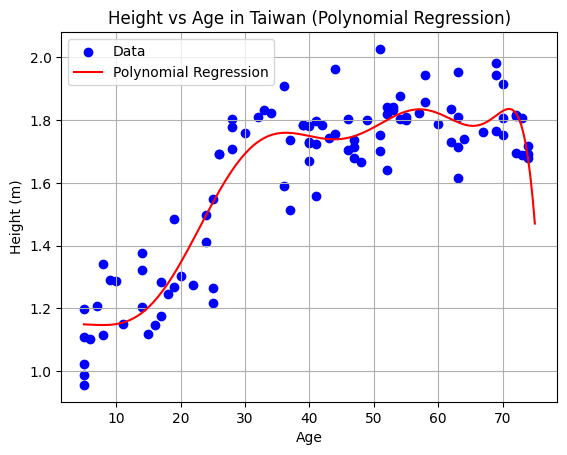

In [ ]:
# overfitting
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 创建多项式回归模型
degree = 10  # 多项式的阶数
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X, height)





# 在拟合的范围内生成更密集的年龄数据
age_range = np.linspace(5, 75, 200).reshape(-1, 1)

# 使用多项式回归模型预测身高
predicted_height = polyreg.predict(age_range)






# 绘制数据和多项式回归曲线
plt.scatter(age, height, color='blue', label='Data')  # 原始数据散点图
plt.plot(age_range, predicted_height, color='red', label='Polynomial Regression')  # 多项式回归曲线
plt.xlabel('Age')
plt.ylabel('Height (m)')
plt.title('Height vs Age in Taiwan (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

Intercept: 0.8979443961109957
Coefficients: [ 0.          0.03181382 -0.00027383]


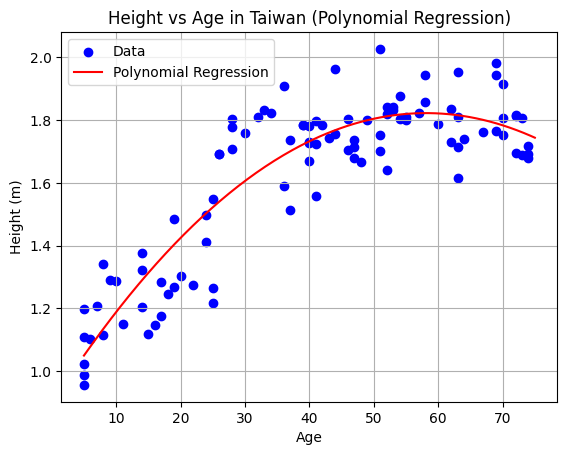

In [ ]:
# model is just right
# 创建多项式回归模型
degree = 2  # 多项式的阶数
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X, height)



# 提取多项式回归模型中的线性回归步骤
linear_reg_step = polyreg.named_steps['linearregression']

# 提取回归参数
intercept = linear_reg_step.intercept_
coefficients = linear_reg_step.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)



# 在拟合的范围内生成更密集的年龄数据
age_range = np.linspace(5, 75, 200).reshape(-1, 1)

# 使用多项式回归模型预测身高
predicted_height = polyreg.predict(age_range)

# 绘制数据和多项式回归曲线
plt.scatter(age, height, color='blue', label='Data')  # 原始数据散点图
plt.plot(age_range, predicted_height, color='red', label='Polynomial Regression')  # 多项式回归曲线
plt.xlabel('Age')
plt.ylabel('Height (m)')
plt.title('Height vs Age in Taiwan (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 示例数据
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])

# 转换X的形状以适应sklearn的要求
X = X[:, np.newaxis]

# 创建并拟合二次多项式回归模型
degree = 2
polyreg = PolynomialFeatures(degree=degree)
X_poly = polyreg.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# 提取回归参数
intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)


Intercept: 1.000000000000003
Coefficients: [0.00000000e+00 1.00000000e+00 9.99200722e-16]
